In [1]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [2]:
sns.set_context("notebook")
sns.set_style("darkgrid")

plt.rcParams["figure.figsize"] = (6, 4)
plt.rcParams["figure.dpi"] = 120


def bootstrap_plot(var, n_samples: int = 500):
    sample = np.random.choice(var, (n_samples, var.shape[0]))

    mean = sample.mean(axis=1)
    median = np.median(sample, axis=1)
    midrange = 0.5 * (sample.max(axis=1) + sample.min(axis=1))

    _, bins = np.histogram(np.concatenate((mean, median, midrange)))

    fig, ax = plt.subplots(2, 3, sharex=True, sharey="col")

    def _plot(data, name, ax0, ax1, value):
        c025 = np.percentile(data, 2.5)
        c975 = np.percentile(data, 97.5)

        _ = ax0.plot(data, range(n_samples), ".")
        _ = ax0.vlines(c025, 0, n_samples, "k")
        _ = ax0.vlines(c975, 0, n_samples, "k")

        _ = ax1.hist(data, bins=bins)
        _ = ax1.vlines(c025, 0, n_samples, "k")
        _ = ax1.vlines(c975, 0, n_samples, "k")

        _ = ax0.set_title(f"{name}={value:.3}\n[{c025:.3}, {c975:.3}]")

    _plot(mean, "Mean", ax[0][0], ax[1][0], var.mean())
    _plot(median, "Median", ax[0][1], ax[1][1], np.median(var))
    _plot(midrange, "Midrange", ax[0][2], ax[1][2], 0.5 * (var.min() + var.max()))

    _ = ax[0][0].set_ylabel("Subsample")
    _ = ax[1][0].set_ylabel("Count")

    fig.suptitle("Bootstrap Plot")

    plt.tight_layout()

# Bootstrap Plot Uniform Data

https://www.itl.nist.gov/div898/handbook/eda/section3/eda334.htm

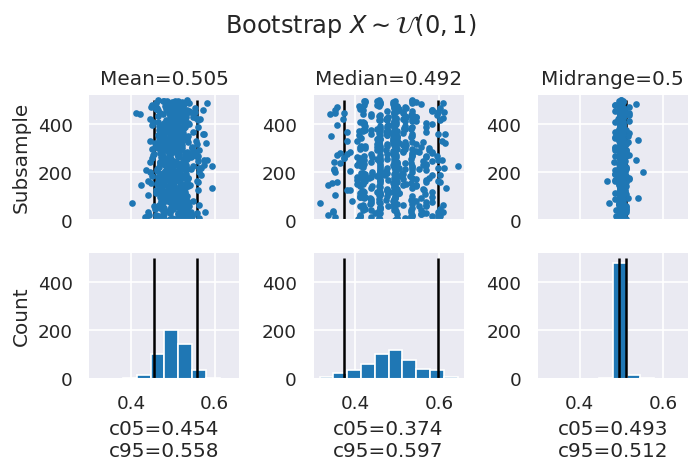

In [3]:
x = np.random.uniform(0, 1, 100)
bootstrap_plot(x)
_ = plt.suptitle(r"Bootstrap $X \sim \mathcal{U}(0, 1)$")

# Bootstrap Plot Normal Data


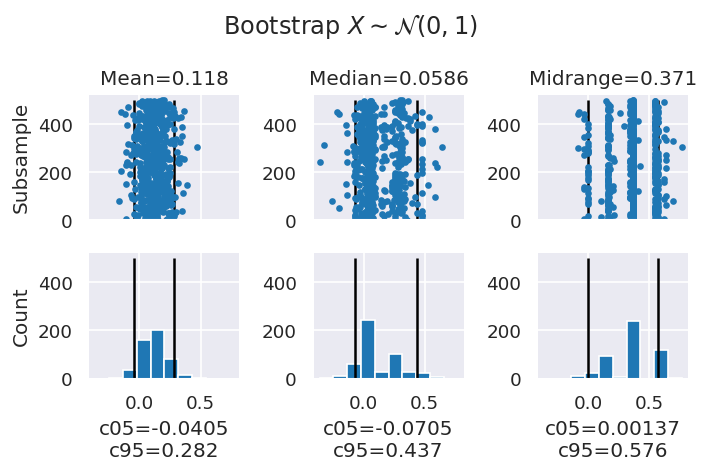

In [4]:
x = np.random.normal(0, 1, 100)
bootstrap_plot(x)
_ = plt.suptitle(r"Bootstrap $X \sim \mathcal{N}(0, 1)$")